Read in the data.

In [2]:
import pandas as pd

df = pd.read_csv('/Users/morganfry/Downloads/Homework_01_2022/recipes.csv')

print(df)

      recipe_id                  ingredient      cuisine
0         44902                       sugar  southern_us
1         44902                  large eggs  southern_us
2         44902           all-purpose flour  southern_us
3         44902                 baking soda  southern_us
4         44902                  buttermilk  southern_us
...         ...                         ...          ...
2248      16940               baking powder      british
2249      16940  extra sharp cheddar cheese      british
2250      16940                 heavy cream      british
2251      16940        chopped fresh chives      british
2252      16940           all-purpose flour      british

[2253 rows x 3 columns]


In [3]:
df['recipe_id'].nunique()

200

Make sure the ID variables is character or factor, not numeric.

In [4]:
df['recipe_id'] = df['recipe_id'].astype(str)

What variables are in the dataset? What datatype are they?

In [5]:
print(df.columns)

print(df.dtypes)

Index(['recipe_id', 'ingredient', 'cuisine'], dtype='object')
recipe_id     object
ingredient    object
cuisine       object
dtype: object


How many different unique ingredients are there?

In [6]:
df['ingredient'].nunique()

722

What are the top five most frequent ingredients?

In [7]:
print(df['ingredient'].value_counts()[:5])


salt                 148
sugar                121
water                 51
all-purpose flour     42
garlic                32
Name: ingredient, dtype: int64


Create a frequency bar chart of the ingredients showing the distribution of ingredients.

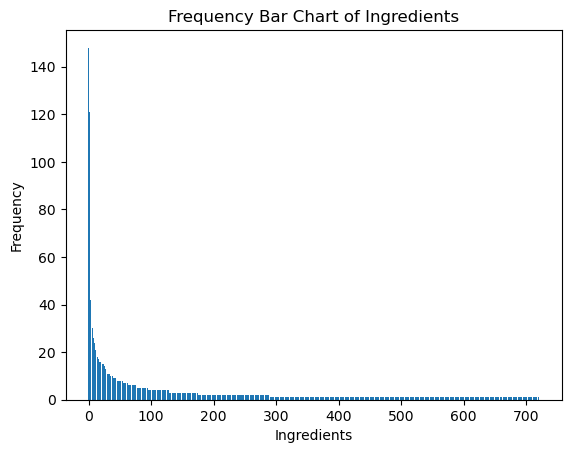

In [8]:
import matplotlib.pyplot as plt

import numpy as np

labels = pd.Series(df['ingredient'].value_counts().index)

encoded_labels, _ = pd.factorize(labels)

x = encoded_labels

y = df['ingredient'].value_counts().values

f, ax = plt.subplots()

plt.bar(x, y)

plt.title("Frequency Bar Chart of Ingredients")

plt.xlabel("Ingredients")

plt.ylabel("Frequency")

plt.show()

Create a dot plot of the top 5% of ingredients.

[148 121  51  42  32  31  30  27  26  24  23  21  20  18  18  18  17  16
  16  16  16  15  15  15  15  14  14  13  13  12  11  11  11  11  11  10]


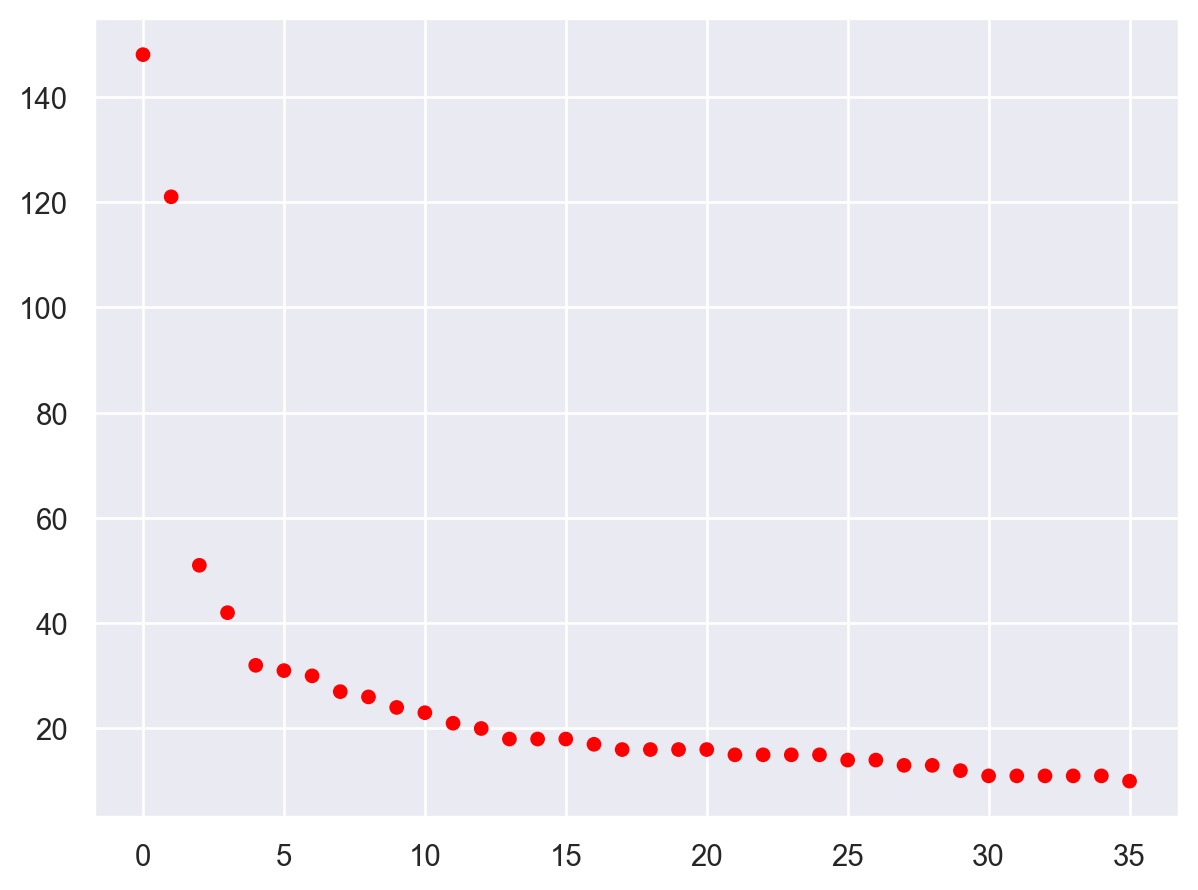

In [9]:
import seaborn.objects as so

from seaborn.objects import Dot

import numpy as np

import math

ninety_fifth_percentile = math.floor(df['ingredient'].value_counts().shape[0]*0.05)

labels = pd.Series(df['ingredient'].value_counts())[:ninety_fifth_percentile]

encoded_labels, _ = pd.factorize(labels.index)

x = encoded_labels

y = df['ingredient'].value_counts().values[:ninety_fifth_percentile]

print(y)

plot = so.Plot(x, y)

plot.label(x = labels.index)

plot.add(Dot(pointsize = 5, color = 'red'))




Use the Jaccard similarity function to compare two sets of ingredients for a pair of recipes.

Number of recipes is: 200
0.9272449189479914
                                                    (potatoes, sugar, salt, chicken breasts, frozen peas, evaporated milk, ground pepper, onions, garlic, butter, water, all-purpose flour)  \
(potatoes, sugar, salt, chicken breasts, frozen...                                           0.000000                                                                                         
(vanilla ice cream, sugar, asti spumante, bosc ...                                           0.904762                                                                                         
(milk, heavy cream, sugar, butter, peaches, cin...                                           0.882353                                                                                         
(potatoes, sugar, red chili peppers, onions, ch...                                           0.789474                                                                                         


/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['frozenset']. An error will be raised in 1.2.
  warnings.warn(
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['frozenset']. An error will be raised in 1.2.
  warnings.warn(


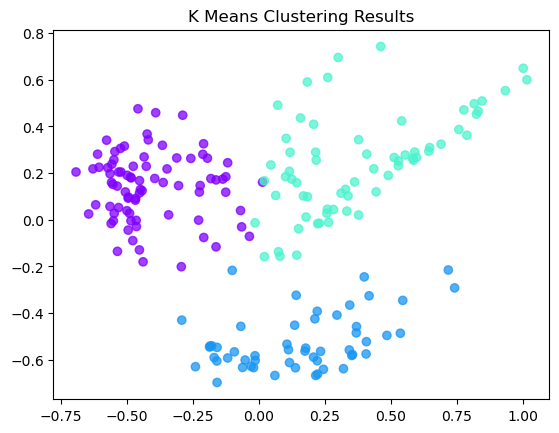

In [10]:
import pandas as pd

import numpy as np

from sklearn.cluster import KMeans

from itertools import combinations

from scipy.spatial.distance import jaccard

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

recipes = df.groupby('recipe_id')['ingredient'].apply(set)

n_recipes = recipes.shape[0]

print('Number of recipes is:', n_recipes)

recipe_pairs = list(combinations(recipes.values, 2))

from scipy.spatial.distance import jaccard

def jaccard_similarity(set1, set2):
    set1 = set(set1)
    set2 = set(set2)
    union = len(set1.union(set2))
    intersection = len(set1.intersection(set2))
    return 1.0 - float(intersection) / float(union)

ingredient_sets = []
for tuple in recipe_pairs:
    for ingredient_set in tuple:
        ingredient_sets.append(frozenset(ingredient_set))

ingredient_sets = list(set(ingredient_sets))

similarity_matrix = np.zeros((len(ingredient_sets), len(ingredient_sets)))
for i, set1 in enumerate(ingredient_sets):
    for j, set2 in enumerate(ingredient_sets):
        similarity = jaccard_similarity(set1, set2)
        similarity_matrix[i][j] = similarity

matrix = pd.DataFrame(similarity_matrix, columns=ingredient_sets, index=ingredient_sets)

print(matrix.mean().mean())

print(matrix)

kmeans = KMeans(n_clusters=3).fit(matrix)

labels = kmeans.labels_

pca = PCA(n_components=2)

matrix_2d = pca.fit_transform(matrix)

plt.style.use('default')

plt.scatter(matrix_2d[:, 0], matrix_2d[:, 1], c=plt.cm.rainbow(labels / 5.), alpha=0.75)

plt.title('K Means Clustering Results')

plt.show()












/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['frozenset']. An error will be raised in 1.2.
  warnings.warn(
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['frozenset']. An error will be raised in 1.2.
  warnings.warn(
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn

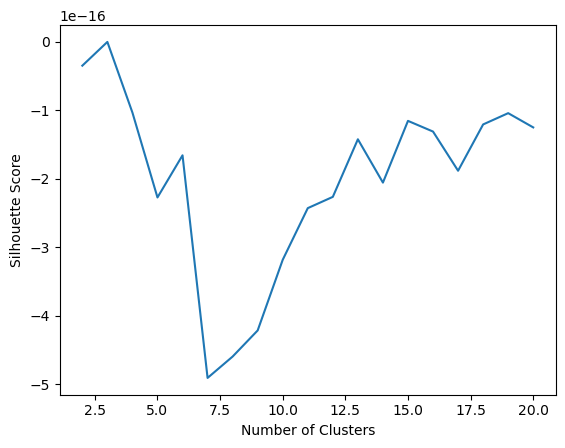

Optimal number of clusters: 3


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

max_clusters = 20

def determine_optimal_clusters(matrix, max_clusters):
    scores = []
    for num_clusters in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(matrix)
        labels = kmeans.labels_
        scores.append(silhouette_score(matrix, labels, metric='jaccard'))
    
    plt.plot(range(2, max_clusters+1), scores)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()
    
    optimal_clusters = np.argmax(scores) + 2
    return optimal_clusters


optimal_clusters = determine_optimal_clusters(matrix, max_clusters)
print("Optimal number of clusters:", optimal_clusters)
